# Chapter 1: The Causal-Behavioral Framework for Data Analysis

## Confound it! The hidden dangers of letting regression sort it out

### Data and libraries

In [1]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

### Why correlation is not causation: a confounder in action

In [2]:
#Reading the data
stand_data_df = pd.read_csv('chap1-stand_data.csv')

<AxesSubplot:xlabel='temps', ylabel='icecream_sales'>

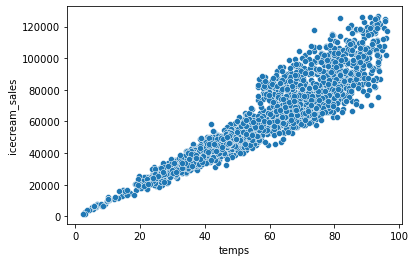

In [3]:
#Plotting ice-cream sales against temperatures
sns.scatterplot(x='temps', y='icecream_sales', data=stand_data_df)

In [4]:
#Running linear regressions 
#Biased model (coeff is 1,145 but should be 1,000)
print(ols("icecream_sales ~ temps", data=stand_data_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         icecream_sales   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                 1.684e+04
Date:                Sat, 08 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:19:21   Log-Likelihood:                -25183.
No. Observations:                2400   AIC:                         5.037e+04
Df Residuals:                    2398   BIC:                         5.038e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6169.8442    531.506    -11.608      0.0

In [5]:
#correct model (coeffs are 1,000 and 20,000)
print(ols("icecream_sales ~ temps + summer_months", data=stand_data_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         icecream_sales   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 2.016e+04
Date:                Sat, 08 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:19:29   Log-Likelihood:                -24225.
No. Observations:                2400   AIC:                         4.846e+04
Df Residuals:                    2397   BIC:                         4.847e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.0690    374.401     -0.019

In [6]:
#Model biased by extra controlling
print(ols("icecream_sales ~ temps + summer_months + iced_coffee_sales", 
          data=stand_data_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         icecream_sales   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.344e+04
Date:                Sat, 08 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:19:43   Log-Likelihood:                -24225.
No. Observations:                2400   AIC:                         4.846e+04
Df Residuals:                    2396   BIC:                         4.848e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -15.8271    374.58

In [ ]:
##### Second example: survey data #####

#Reading the data
survey_data_df = pd.read_csv('chap1-survey_data.csv')

#Reformatting shopped variable to binary
survey_data_df['shopped'] = pd.Categorical(survey_data_df.shopped, 
                                      categories=[0,1], 
                                      ordered = True)

In [ ]:
### Plotting relationships between variables in the data

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
#Scatterplot of chocolate versus vanilla taste 
ax1.set_xlim(0,28)
ax1.set_ylim(0,28)
ax1.set_xlabel('Taste for vanilla')
ax1.set_ylabel('Taste for chocolate')
sns.regplot(x='vanilla', y='chocolate', data=survey_data_df, 
            line_kws={'color':'black'}, ax=ax1)
#Boxplot of vanilla taste against shopping behavior
ax2.set_xlabel('Shopped (Y/N)')
ax2.set_ylabel('Taste for vanilla')
sns.boxplot(x='shopped', y='vanilla', data=survey_data_df, ax=ax2)
#Boxplot of chocolate taste against shopping behavior
ax3.set_xlabel('Shopped (Y/N)')
ax3.set_ylabel('Taste for chocolate')
sns.boxplot(x='shopped', y='chocolate', data=survey_data_df, ax=ax3)

fig.tight_layout()
plt.show()

In [ ]:
### Plotting same scatterplot but for shoppers only

#Scatterplot of chocolate versus vanilla taste 
sns.regplot(x='vanilla', y='chocolate', 
            data=survey_data_df[survey_data_df.shopped==1], 
            line_kws={'color':'black'})